In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [3]:
steak = pd.read_csv("업종별/육류 소매업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [4]:
print(steak.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327160 entries, 0 to 327159
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      327160 non-null  object
 1   CARD_SIDO_NM  327160 non-null  object
 2   CARD_CCG_NM   325508 non-null  object
 3   STD_CLSS_NM   327160 non-null  object
 4   HOM_SIDO_NM   327160 non-null  object
 5   HOM_CCG_NM    325628 non-null  object
 6   AGE           327160 non-null  object
 7   SEX_CTGO_CD   327160 non-null  int64 
 8   FLC           327160 non-null  int64 
 9   CSTMR_CNT     327160 non-null  int64 
 10  AMT           327160 non-null  int64 
 11  CNT           327160 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 32.4+ MB
None


In [5]:
#안쓰는 컬럼 드랍
df=steak.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [6]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [7]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327160 entries, 0 to 327159
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      327160 non-null  object
 1   CARD_SIDO_NM  327160 non-null  object
 2   HOM_SIDO_NM   327160 non-null  object
 3   AGE           327160 non-null  object
 4   SEX_CTGO_CD   327160 non-null  int64 
 5   FLC           327160 non-null  int64 
 6   CSTMR_CNT     327160 non-null  int64 
 7   AMT           327160 non-null  int64 
 8   CNT           327160 non-null  int64 
 9   year          327160 non-null  int64 
 10  month         327160 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 30.0+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  20s            1    1         63   
1   201901           강원          강원  20s            2    1         26   
2   201901           강원          강원  20s            2  

In [8]:
df.CARD_SIDO_NM.unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [9]:
df.HOM_SIDO_NM.unique()

array(['강원', '경기', '인천', '서울', '대구', '충북', '충남', '경북', '대전', '전남', '광주',
       '경남', '전북', '부산', '울산', '제주', '세종'], dtype=object)

CARD_SIDO_NM
세종      5118674784
제주     15644054937
강원     27206560588
대전     30483805113
충북     34892300596
전남     37110893912
충남     40975680834
울산     43711576655
광주     44652069336
전북     45741599433
인천     60613699101
경남     69841442675
경북     73536076477
부산     77045959285
대구     95603159283
서울    210141658973
경기    253719875404
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

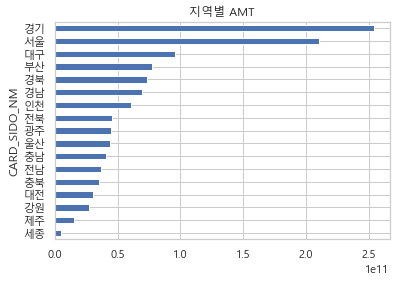

In [10]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901     82167087718
201902     83787722117
201903     65668894628
201904     65441897209
201905     71833508410
201906     68484764672
201907     66545586821
201908     69774080309
201909     98843834802
201910     65870261274
201911     72886993185
201912     82264334515
202001    114895305445
202002     69440767926
202003     88134048355
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

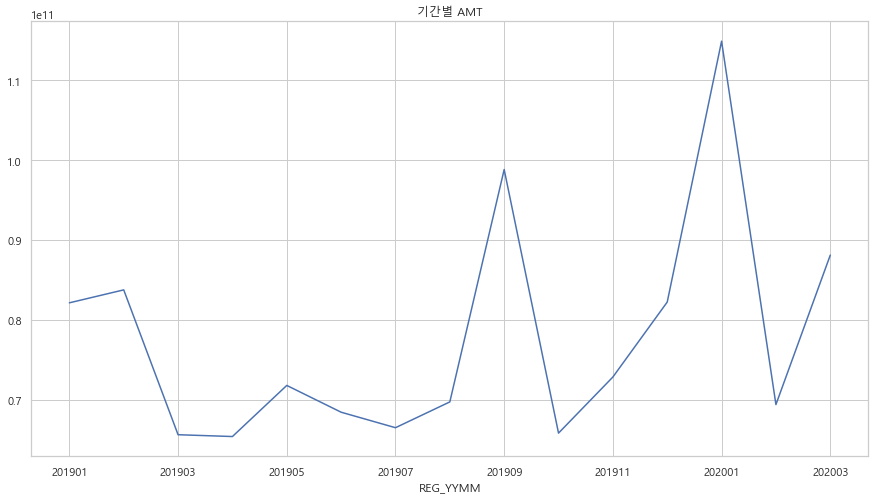

In [11]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

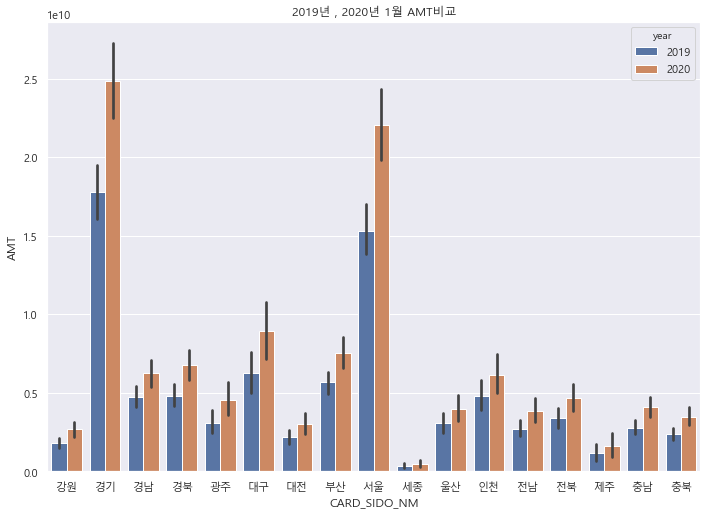

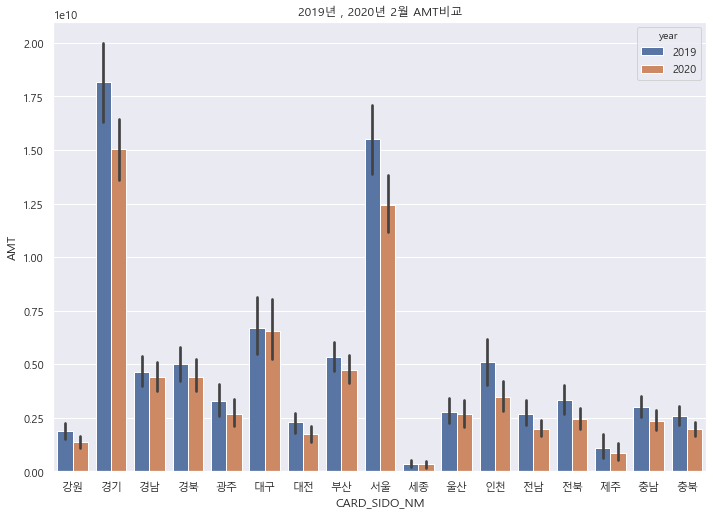

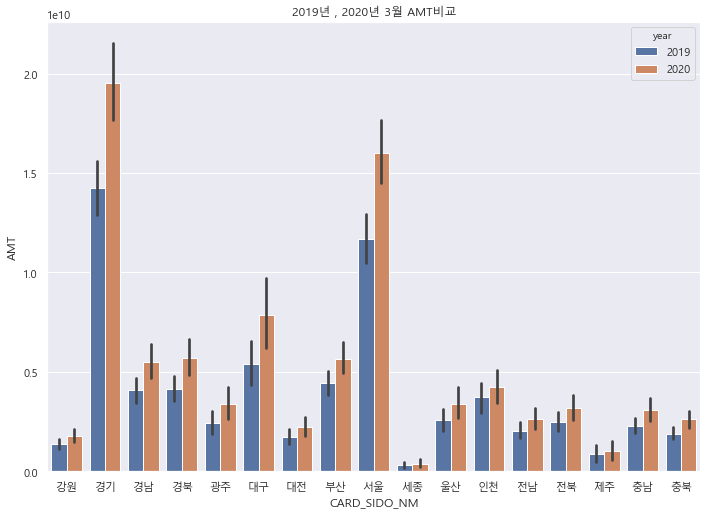

In [12]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

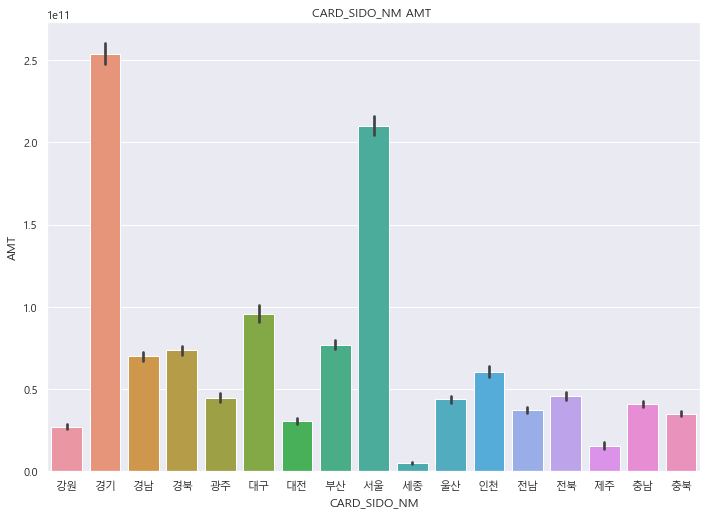

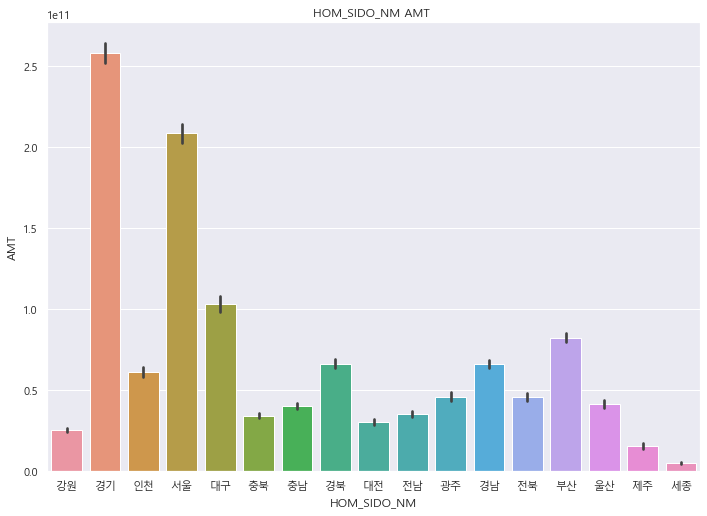

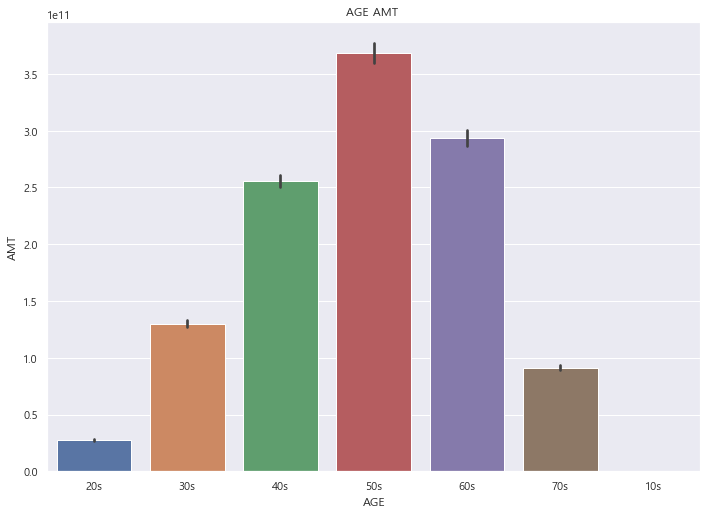

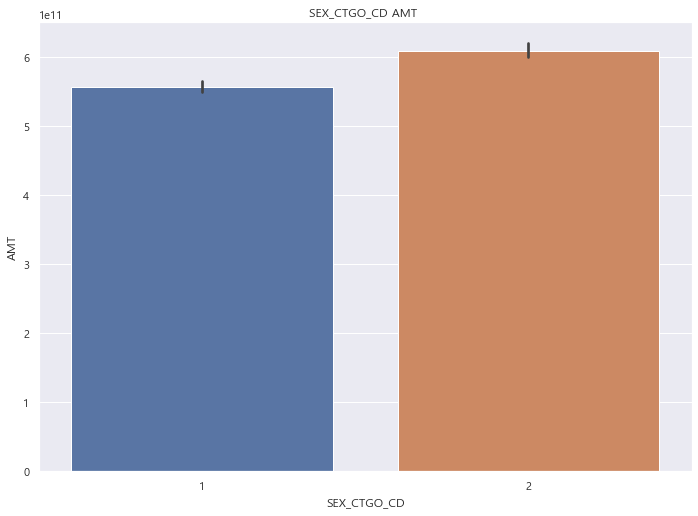

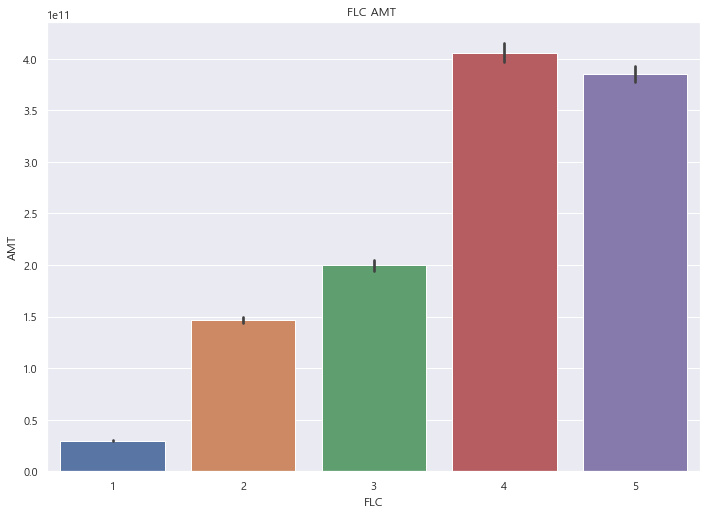

In [13]:
cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()

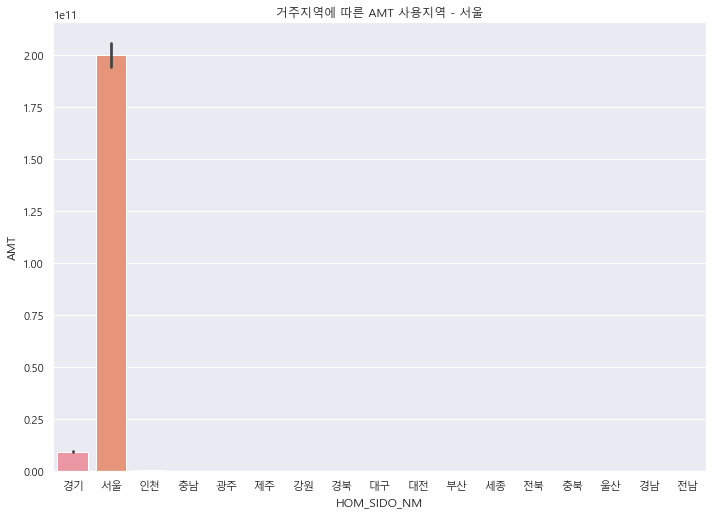

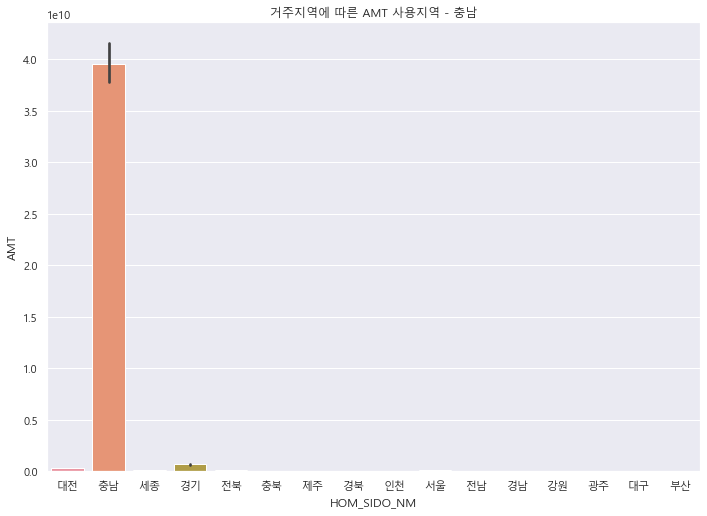

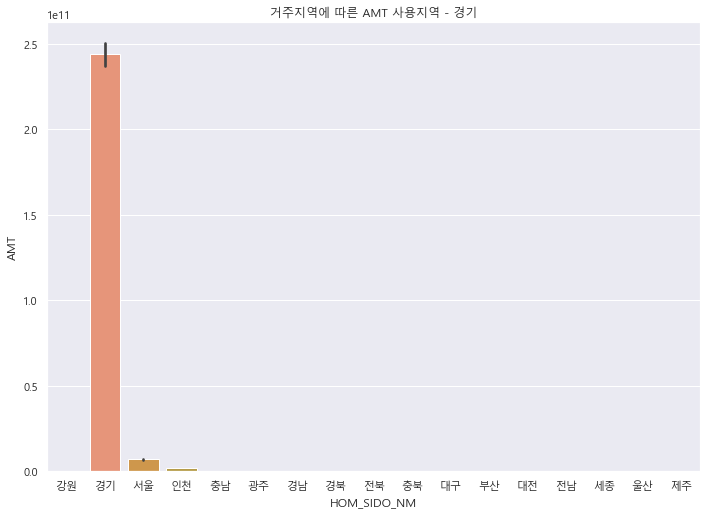

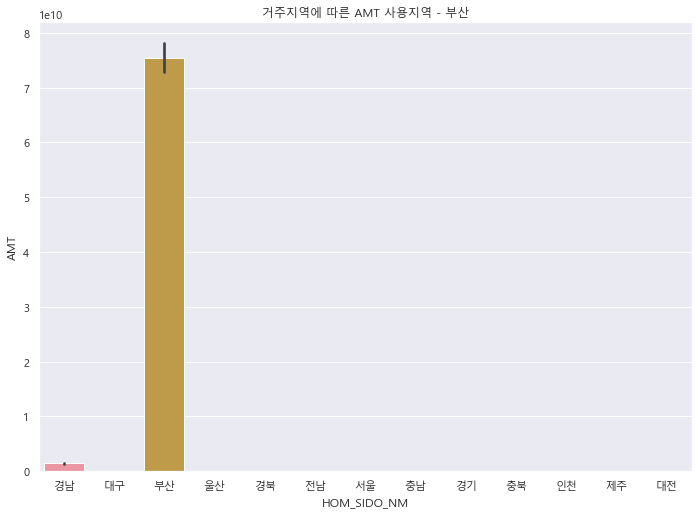

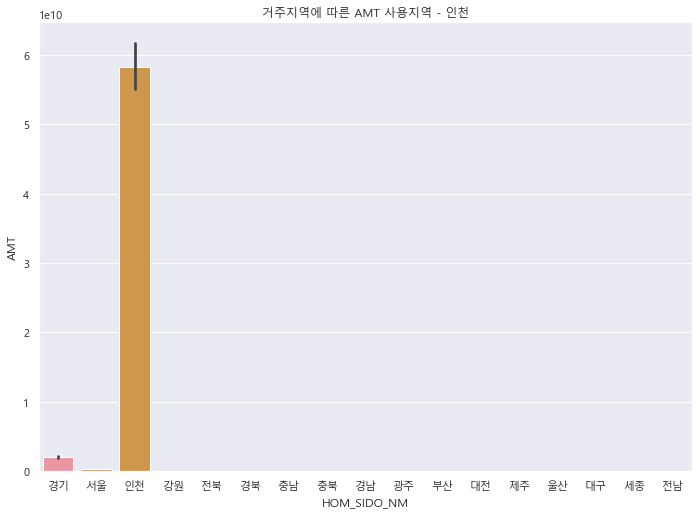

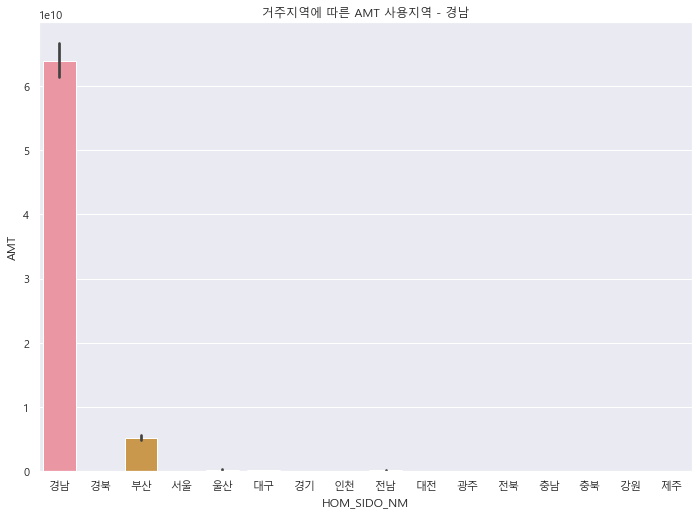

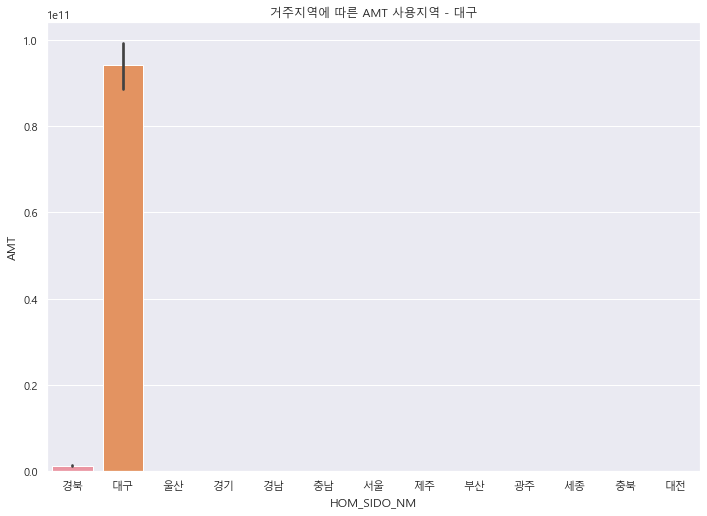

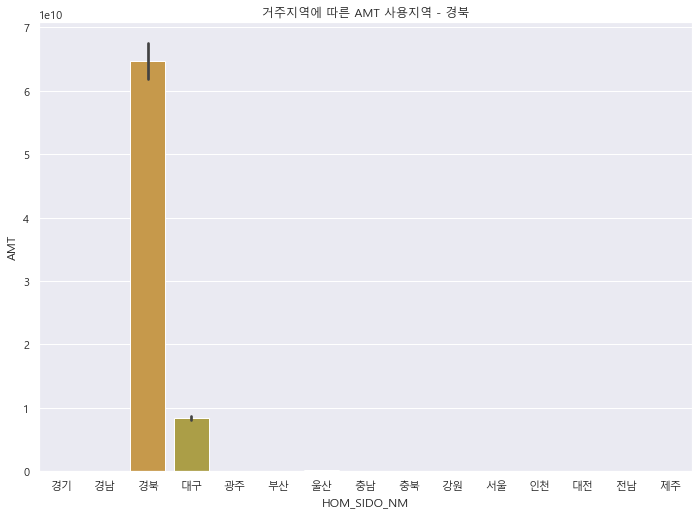

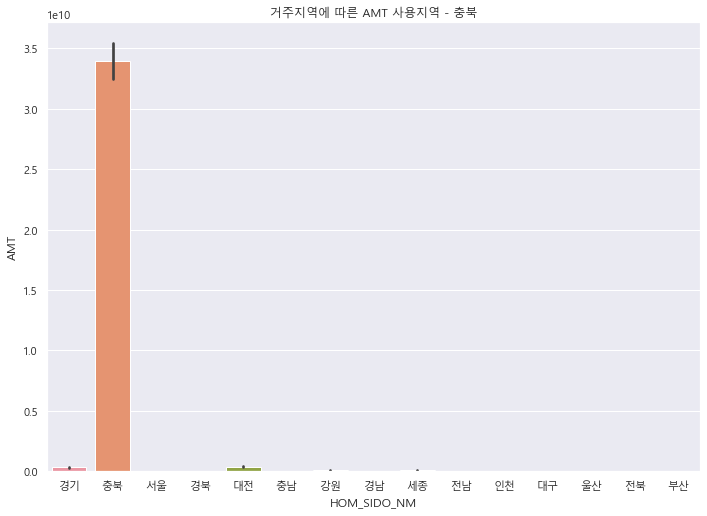

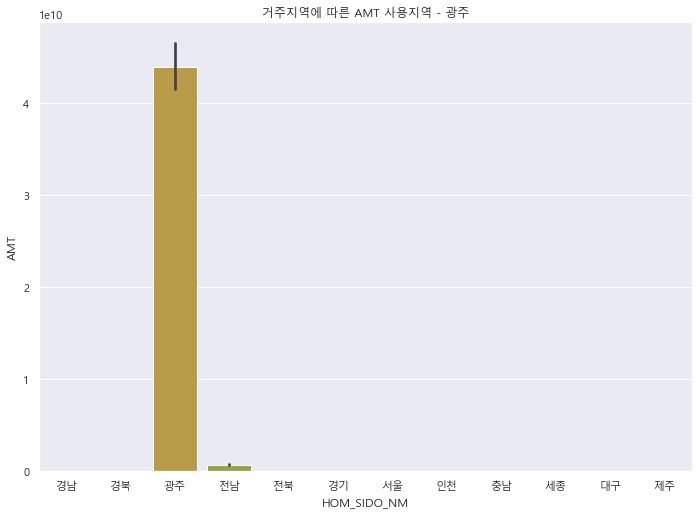

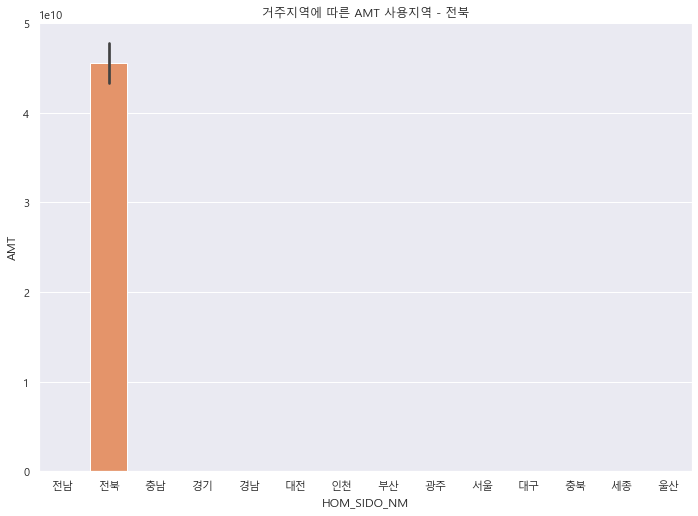

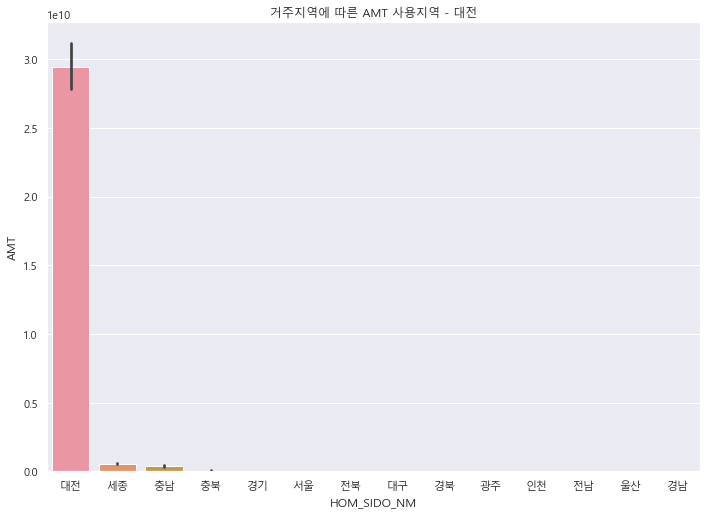

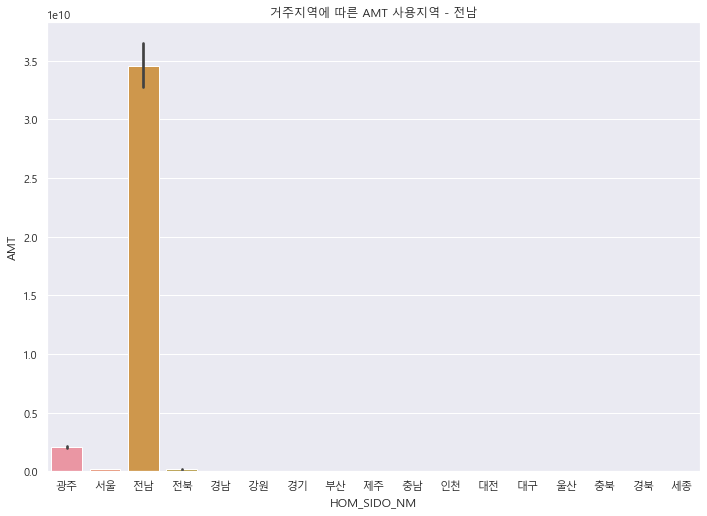

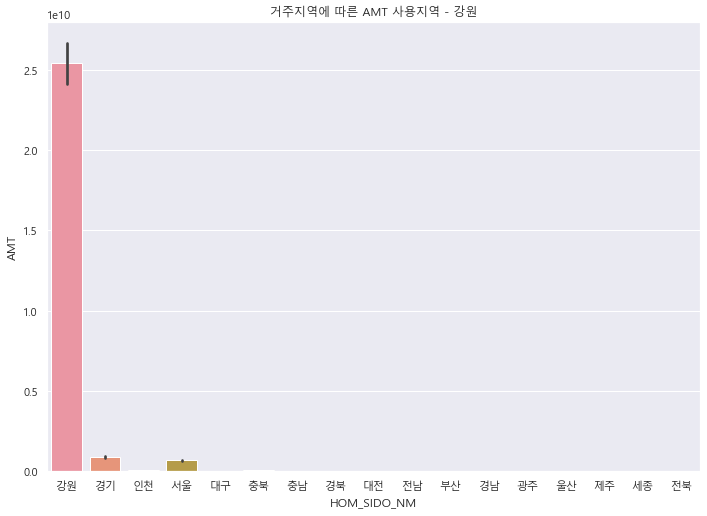

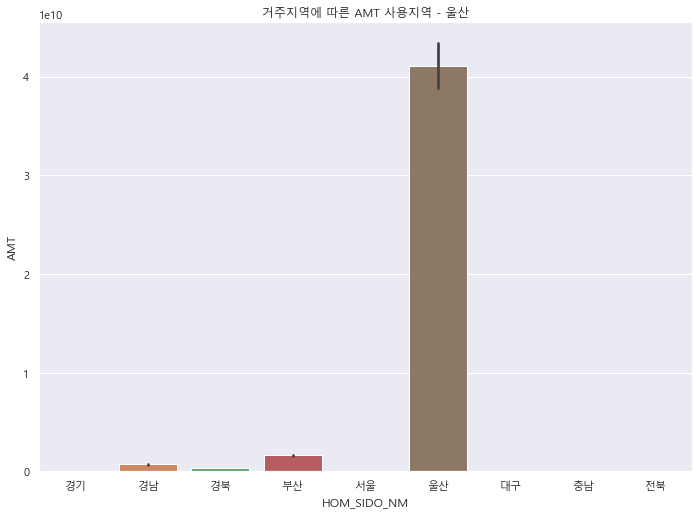

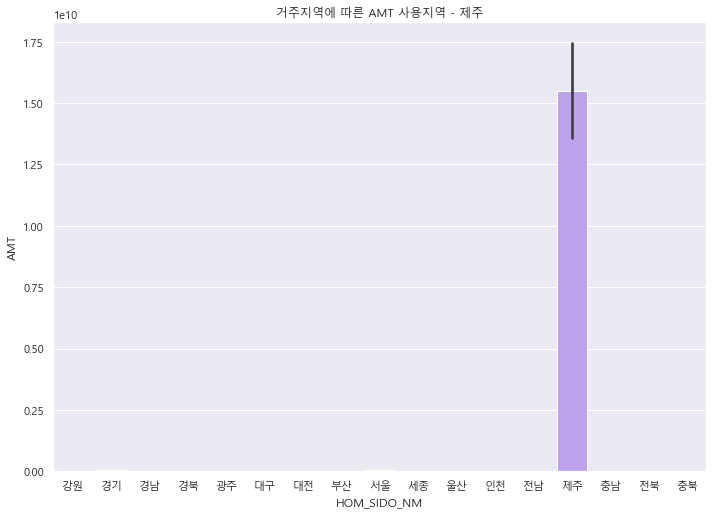

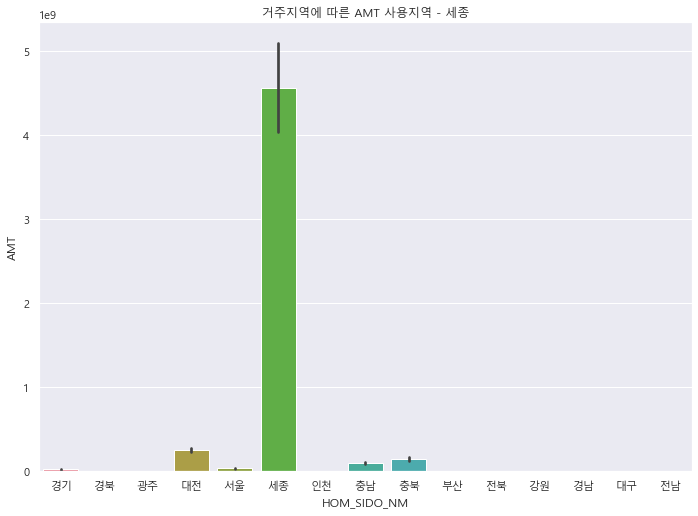

In [14]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()